In [1]:
import os, sys, json, platform
import pandas as pd
import numpy as np


# env configure
splitter = "\\" if 'Win' in platform.system() else "/"
work_dir = os.getcwd() + splitter
root_dir = os.path.dirname(os.path.dirname(work_dir)) + splitter
data_dir = root_dir + 'data' + splitter
src_dir = root_dir + 'src' + splitter

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.2f}'.format

print(os.listdir(root_dir))
print(data_dir)

['.vs', 'data', 'engage3_repo.pyproj', 'new_challenge.pdf', 'notebook', 'src']
g:\BaiduSyncdisk\github\engage3_repo\data\


In [2]:
tables = ['prices', 'auditors']
dfs = {}
for tab in tables:
    dfs[tab] = pd.read_csv(data_dir+tab+".csv")
    # display(dfs[tab])


In [3]:
# read and transform json to csv and read stores to DataFrame
stores_file_path = data_dir + 'stores.json'
with open(stores_file_path) as stores_file:
    stores = json.load(stores_file)

print(stores)
dfs['stores'] = pd.DataFrame(stores)
display(dfs['stores'].head())

# save to csv
dfs['stores'].to_csv(data_dir+'stores.csv')

[{'Store ID': 66999, 'Banner': 'Walmart', 'Region': 'Northern California'}, {'Store ID': 4698, 'Banner': 'Trader Joes', 'Region': 'Northern California'}, {'Store ID': 39482, 'Banner': 'Safeway', 'Region': 'Northern California'}, {'Store ID': 34957, 'Banner': 'Whole Foods', 'Region': 'Northern California'}, {'Store ID': 12837, 'Banner': 'Walmart', 'Region': 'New York'}, {'Store ID': 9487, 'Banner': 'Trader Joes', 'Region': 'New York'}, {'Store ID': 2938, 'Banner': 'Wegmans', 'Region': 'New York'}, {'Store ID': 50948, 'Banner': 'Whole Foods', 'Region': 'New York'}, {'Store ID': 40593, 'Banner': 'Walmart', 'Region': 'Kansas'}, {'Store ID': 29384, 'Banner': 'Trader Joes', 'Region': 'Kansas'}, {'Store ID': 3948, 'Banner': 'Wegmans', 'Region': 'Kansas'}, {'Store ID': 39485, 'Banner': 'Safeway', 'Region': 'Kansas'}, {'Store ID': 39287, 'Banner': 'Whole Foods', 'Region': 'Kansas'}, {'Store ID': 50495, 'Banner': 'Walmart', 'Region': 'Texas'}, {'Store ID': 40586, 'Banner': 'Trader Joes', 'Region

,Store ID,Banner,Region
0,66999,Walmart,Northern California
1,4698,Trader Joes,Northern California
2,39482,Safeway,Northern California
3,34957,Whole Foods,Northern California
4,12837,Walmart,New York


In [4]:
# get general info of tables
for tab in dfs.keys():
    print(f"==============={tab}================\n{dfs[tab].info()}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12315 entries, 0 to 12314
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Auditor ID  12315 non-null  int64  
 1   Date        12315 non-null  object 
 2   Price       12315 non-null  float64
 3   Store ID    12315 non-null  int64  
 4   UPC         12315 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 481.2+ KB
===============prices================
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Auditor ID  8 non-null      int64 
 1   First       8 non-null      object
 2   Last        8 non-null      object
 3   Region      8 non-null      object
dtypes: int64(1), object(3)
memory usage: 384.0+ bytes
===============auditors================
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 ent

In [15]:
# overview tables
for tab in dfs.keys():
    print(f"---------------- {tab} -----------")
    display(dfs[tab].head())

---------------- prices -----------


,Auditor ID,Date,Price,Store ID,UPC
0,234,03/03/20,24.95,66999,268588472
1,234,03/12/20,49.71,66999,475245085
2,234,03/05/20,25.75,66999,126967843
3,234,03/08/20,18.81,66999,708930835
4,234,03/08/20,33.32,66999,325885139


---------------- auditors -----------


,Auditor ID,First,Last,Region
0,234,Sue,Smith,Northern California
1,536,Bob,Smith,Northern California
2,98,Jack,Smith,New York
3,203,Jill,Smith,New York
4,304,Jerry,Johnson,Texas


---------------- stores -----------


,Store ID,Banner,Region
0,66999,Walmart,Northern California
1,4698,Trader Joes,Northern California
2,39482,Safeway,Northern California
3,34957,Whole Foods,Northern California
4,12837,Walmart,New York


---------------- sp -----------


,Auditor ID,Date,Price,Store ID,UPC,Banner,Region
0,234,03/03/20,24.95,66999,268588472,Walmart,Northern California
1,234,03/12/20,49.71,66999,475245085,Walmart,Northern California
2,234,03/05/20,25.75,66999,126967843,Walmart,Northern California
3,234,03/08/20,18.81,66999,708930835,Walmart,Northern California
4,234,03/08/20,33.32,66999,325885139,Walmart,Northern California


---------------- spa -----------


,Auditor ID,Date,Price,Store ID,UPC,Banner,First,Last,Region
0,234,03/03/20,24.95,66999,268588472,Walmart,Sue,Smith,Northern California
1,234,03/12/20,49.71,66999,475245085,Walmart,Sue,Smith,Northern California
2,234,03/05/20,25.75,66999,126967843,Walmart,Sue,Smith,Northern California
3,234,03/08/20,18.81,66999,708930835,Walmart,Sue,Smith,Northern California
4,234,03/08/20,33.32,66999,325885139,Walmart,Sue,Smith,Northern California


In [5]:
# merge prices and stores into sp table
dfs['sp'] = pd.merge(dfs['prices'], dfs['stores'], on='Store ID', how='left')
# display(dfs['sp'])

In [16]:
# merge sp and auditors to get spa table
df = pd.merge(dfs['sp'], dfs['auditors'], on='Auditor ID', how='left')
print('merged price and stores and auditors') #len(df))
print(len(df))
display(df.head())

print("check Region mismatch")
print(f"There are {len(df[df['Region_x']!=df['Region_y']])} mismatched Region")

print('drop Region_x which has many missing values')
df = df.drop(columns=['Region_x']).rename(columns={'Region_y': 'Region'})
display(df.head())

# backup df
dfs['spa'] = df.copy()


merged price and stores and auditors
12315


,Auditor ID,Date,Price,Store ID,UPC,Banner,Region_x,First,Last,Region_y
0,234,03/03/20,24.95,66999,268588472,Walmart,Northern California,Sue,Smith,Northern California
1,234,03/12/20,49.71,66999,475245085,Walmart,Northern California,Sue,Smith,Northern California
2,234,03/05/20,25.75,66999,126967843,Walmart,Northern California,Sue,Smith,Northern California
3,234,03/08/20,18.81,66999,708930835,Walmart,Northern California,Sue,Smith,Northern California
4,234,03/08/20,33.32,66999,325885139,Walmart,Northern California,Sue,Smith,Northern California


check Region mismatch
There are 1110 mismatched Region
drop Region_x which has many missing values


,Auditor ID,Date,Price,Store ID,UPC,Banner,First,Last,Region
0,234,03/03/20,24.95,66999,268588472,Walmart,Sue,Smith,Northern California
1,234,03/12/20,49.71,66999,475245085,Walmart,Sue,Smith,Northern California
2,234,03/05/20,25.75,66999,126967843,Walmart,Sue,Smith,Northern California
3,234,03/08/20,18.81,66999,708930835,Walmart,Sue,Smith,Northern California
4,234,03/08/20,33.32,66999,325885139,Walmart,Sue,Smith,Northern California


In [7]:
# check unique values
print(df['Banner'].unique())
print(df['Region'].unique())


['Walmart' 'Trader Joes' nan 'Safeway' 'Whole Foods' 'Wegmans']
['Northern California' 'New York' 'Kansas' 'Texas']


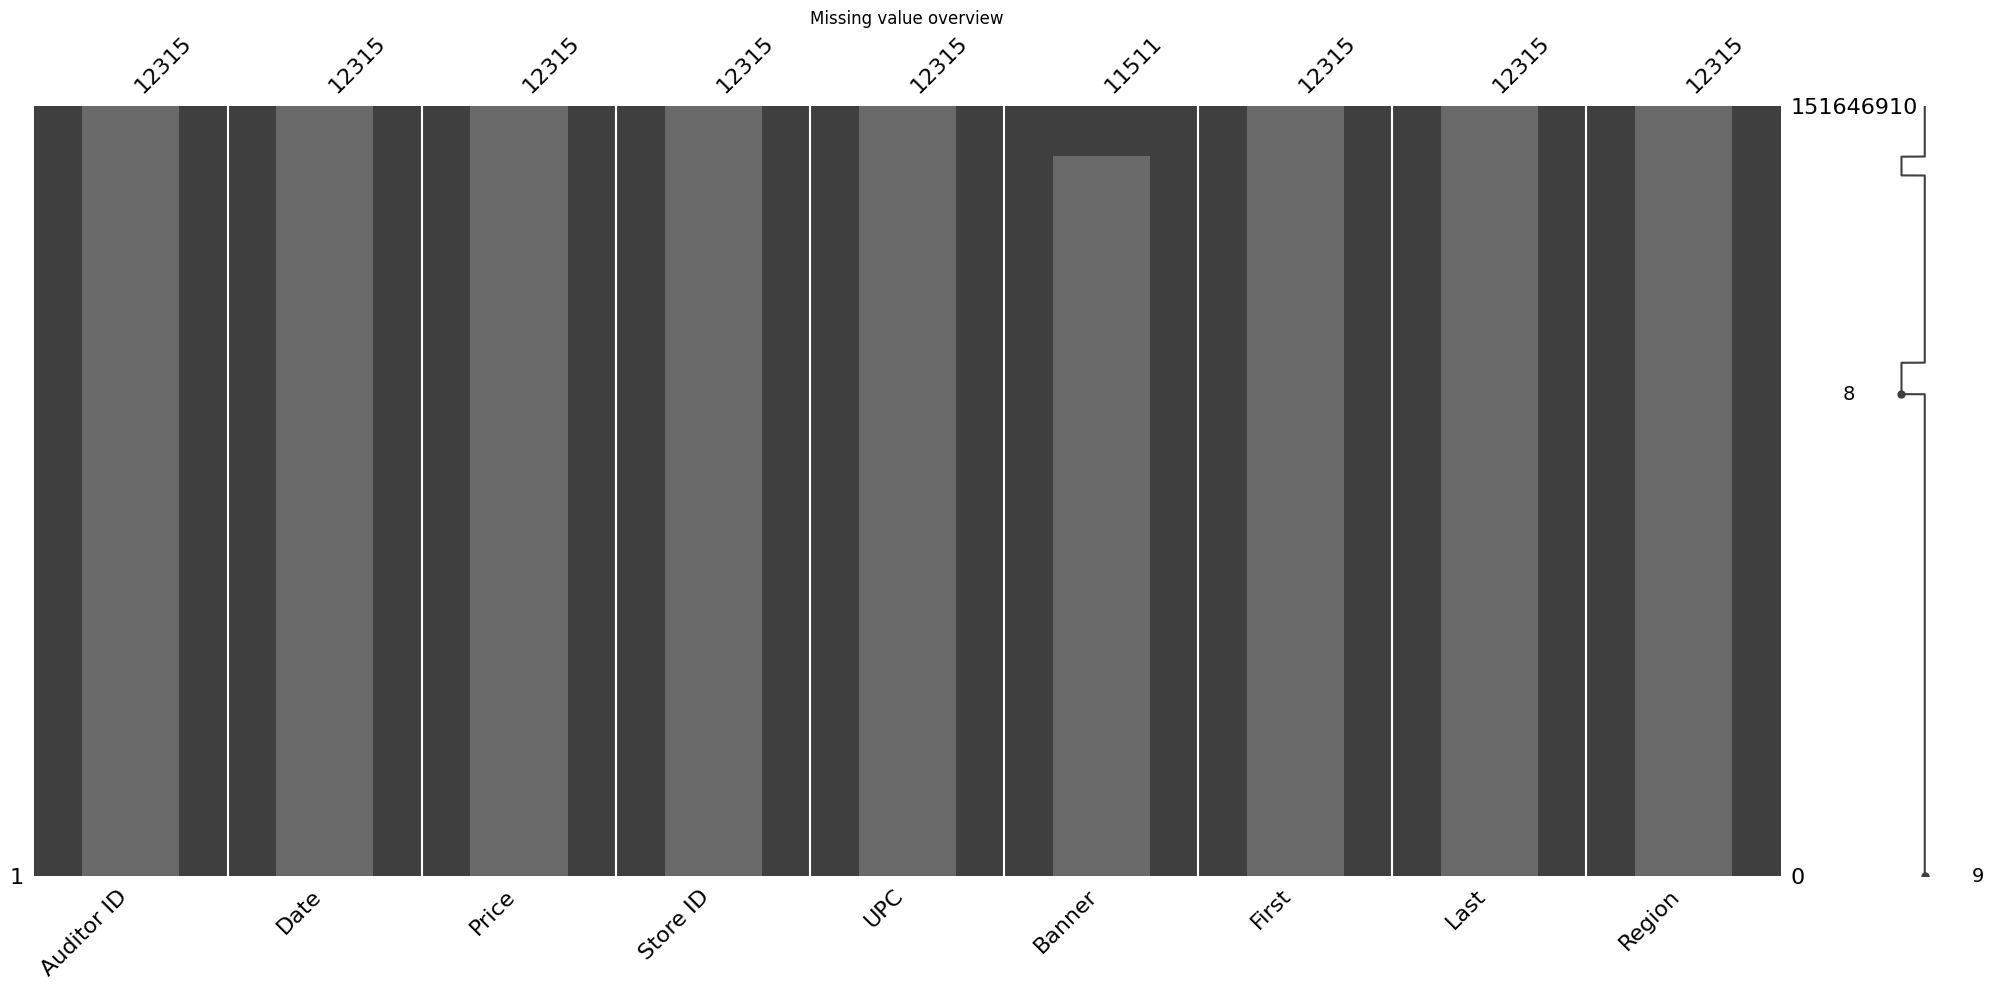

In [8]:
# overview missing values
import missingno as msno
from matplotlib import pyplot as plt
msno.matrix(df)

msno.bar(df)
plt.title('Missing value overview')

plt.show()

"""
Only Banner has missing values. 12315-11511 = 804 datasets missing Banner
"""

In [86]:
# Create a pivot table
pivot_table = dfs['spa'].pivot_table(
    index=['Banner', 'UPC'],  # Indices for rows
    columns='Region',         # Columns for regions
    values='Price',           # Values to aggregate
    aggfunc='mean',           # Aggregation function
    # fill_value=0              # Fill missing values with 0
).reset_index()
# Flatten the columns
pivot_table.columns.name = None

# Display the pivot table
print(len(pivot_table))
print(pivot_table.head())


4931
    Banner       UPC  Kansas  New York  Northern California  Texas
0  Safeway  11873171     NaN      6.09                  NaN   5.19
1  Safeway  15052612   53.99       NaN                  NaN  54.49
2  Safeway  16482322   17.89       NaN                  NaN  18.09
3  Safeway  16729338    7.99      9.39                  NaN   8.09
4  Safeway  16829288    3.59      4.19                  NaN   3.59


        UPC  Region  Price
0  11873171  Kansas    NaN
1  15052612  Kansas  53.99
2  16482322  Kansas  17.89
3  16729338  Kansas   7.99
4  16829288  Kansas   3.59


<Figure size 1200x600 with 0 Axes>

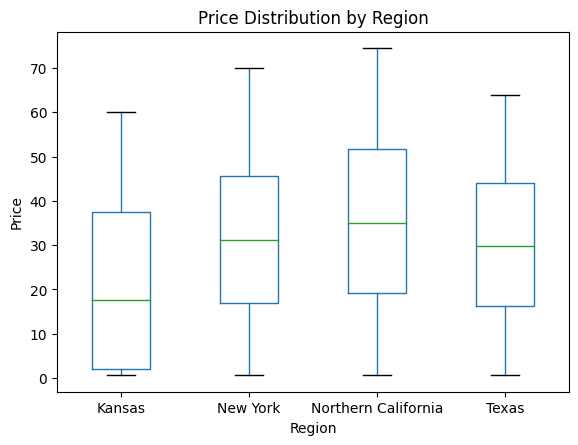

In [87]:
# price distribution in different regions
import matplotlib.pyplot as plt

# Melt the DataFrame to convert it from wide format to long format
melted_df = pd.melt(pivot_table, id_vars=['UPC'], value_vars=['Kansas', 'New York', 'Northern California', 'Texas'], 
                    var_name='Region', value_name='Price')

# Display the melted DataFrame
print(melted_df.head())

# Plotting the price distribution for each region using a box plot
plt.figure(figsize=(12, 6))
melted_df.boxplot(by='Region', column=['Price'], grid=False)
plt.title('Price Distribution by Region')
plt.suptitle('')  # Remove the default title to keep only the main title
plt.xlabel('Region')
plt.ylabel('Price')
plt.show()# Assume 'Region' is the index and 'mean' is a column in the pivot table
# Setting 'Region' as the index if not already set
if 'Region' in pivot_table.columns:
    pivot_table.set_index('Region', inplace=True)

"""
Below figure indicates something anormal in region Kansas
"""

18781
        UPC  Region  Price
0  11873171  Kansas    NaN
1  15052612  Kansas  53.99
2  16482322  Kansas  17.89
3  16729338  Kansas   7.99
4  16829288  Kansas   3.59


<Figure size 1200x600 with 0 Axes>

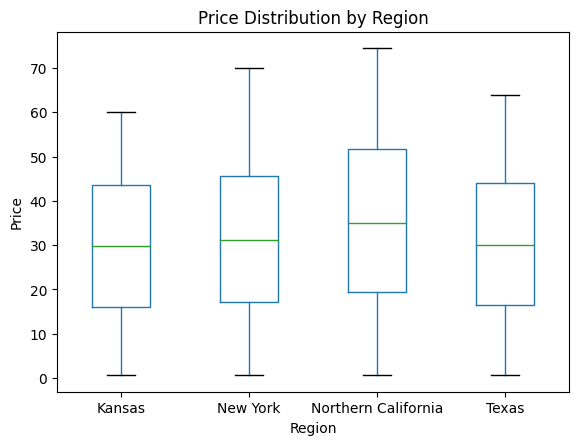

In [88]:
# Melt the DataFrame to convert it from wide format to long format
new_melted_df = melted_df[~melted_df['Price'].isin(anormal_prices)]
# Display the melted DataFrame
print(len(new_melted_df))
print(new_melted_df.head())

# Plotting the price distribution for each region using a box plot
plt.figure(figsize=(12, 6))
new_melted_df.boxplot(by='Region', column=['Price'], grid=False)
plt.title('Price Distribution by Region')
plt.suptitle('')  # Remove the default title to keep only the main title
plt.xlabel('Region')
plt.ylabel('Price')
plt.show()# Assume 'Region' is the index and 'mean' is a column in the pivot table
# Setting 'Region' as the index if not already set
if 'Region' in pivot_table.columns:
    pivot_table.set_index('Region', inplace=True)


Check anormal prices and who collected them

In [10]:
# calculate the price difference and ratio between any two Regions. The formula: v_i-j = (price(region(j)) - price(region(i)), r_i-j = v_i-j/price(region(i))*100%
cols = pivot_table.columns
cols = ['Kansas', 'New York', 'Northern California', 'Texas']

# map regions to abbreviations for easy visualization
abbr = {'Kansas': 'ks', 'New York': 'ny', 'Northern California': 'nc', 'Texas': 'tx'}

# calculate price difference
pdf = {}
pdf['bu_idx'] = pivot_table.copy()

# calculate price difference and saved in features starting with 'v_', ratio starting with 'r_'
for i in range(len(cols)-1):
    for j in range(i+1, len(cols)):
        print(f"calculate price diff {cols[j]} - {cols[i]} and price diff ratio = ({cols[j]} - {cols[i]})/{cols[i]}")
        pdf['bu_idx']['v_'+abbr[cols[j]]+'-'+abbr[cols[i]]] = pdf['bu_idx'][cols[j]] - pdf['bu_idx'][cols[i]]
        pdf['bu_idx']['r_'+abbr[cols[j]]+'-'+abbr[cols[i]]] = (pdf['bu_idx'][cols[j]] - pdf['bu_idx'][cols[i]])*100/pdf['bu_idx'][cols[i]]


calculate price diff New York - Kansas and price diff ratio = (New York - Kansas)/Kansas
calculate price diff Northern California - Kansas and price diff ratio = (Northern California - Kansas)/Kansas
calculate price diff Texas - Kansas and price diff ratio = (Texas - Kansas)/Kansas
calculate price diff Northern California - New York and price diff ratio = (Northern California - New York)/New York
calculate price diff Texas - New York and price diff ratio = (Texas - New York)/New York
calculate price diff Texas - Northern California and price diff ratio = (Texas - Northern California)/Northern California


In [11]:
print(f"There are {len(pdf['bu_idx'])} datasets in pivot table.")
display(pdf['bu_idx'][['Banner', 'UPC']+[colv for colv in pdf['bu_idx'].columns if colv.startswith('v_')]+[colv for colv in pdf['bu_idx'].columns if colv.startswith('r_')]].head())


There are 4931 datasets in pivot table.


,Banner,UPC,v_ny-ks,v_nc-ks,v_tx-ks,v_nc-ny,v_tx-ny,v_tx-nc,r_ny-ks,r_nc-ks,r_tx-ks,r_nc-ny,r_tx-ny,r_tx-nc
0,Safeway,11873171,NaN,NaN,NaN,NaN,-0.90,NaN,NaN,NaN,NaN,NaN,-14.78,NaN
1,Safeway,15052612,NaN,NaN,0.50,NaN,NaN,NaN,NaN,NaN,0.93,NaN,NaN,NaN
2,Safeway,16482322,NaN,NaN,0.20,NaN,NaN,NaN,NaN,NaN,1.12,NaN,NaN,NaN
3,Safeway,16729338,1.40,NaN,0.10,NaN,-1.30,NaN,17.52,NaN,1.25,NaN,-13.84,NaN
4,Safeway,16829288,0.60,NaN,0.00,NaN,-0.60,NaN,16.71,NaN,0.00,NaN,-14.32,NaN


In [13]:
# filter out those data with huge price difference (ratio > 50%)
# Some prices collected for Kansas are anormally different from other regions. The differernce ratios are greater than 50%, up to 4772%
r_columns = [colv for colv in pdf['bu_idx'].columns if colv.startswith('r_')]
v_columns = [colv for colv in pdf['bu_idx'].columns if colv.startswith('v_')]

anormal_df = pdf['bu_idx'][pdf['bu_idx'][r_columns].abs().gt(50).any(axis=1)]
print(f"{len(anormal_df)}/{len(pdf['bu_idx'])} = {len(anormal_df)/len(pdf['bu_idx'])*100:.2f}% anormal data observered")
display(anormal_df[['Banner', 'UPC']+cols+v_columns+r_columns].head())

854/4931 = 17.32% anormal data observered


,Banner,UPC,Kansas,New York,Northern California,Texas,v_ny-ks,v_nc-ks,v_tx-ks,v_nc-ny,v_tx-ny,v_tx-nc,r_ny-ks,r_nc-ks,r_tx-ks,r_nc-ny,r_tx-ny,r_tx-nc
268,Safeway,286906735,10.99,16.89,NaN,11.09,5.90,NaN,0.10,NaN,-5.80,NaN,53.69,NaN,0.91,NaN,-34.34,NaN
3934,Whole Foods,11873171,1.99,5.69,NaN,5.49,3.70,NaN,3.50,NaN,-0.20,NaN,185.93,NaN,175.88,NaN,-3.51,NaN
3935,Whole Foods,15052612,1.99,59.49,NaN,57.79,57.50,NaN,55.80,NaN,-1.70,NaN,2889.45,NaN,2804.02,NaN,-2.86,NaN
3936,Whole Foods,16482322,1.99,19.69,NaN,NaN,17.70,NaN,NaN,NaN,NaN,NaN,889.45,NaN,NaN,NaN,NaN,NaN
3939,Whole Foods,16900911,1.99,32.19,36.19,NaN,30.20,34.20,NaN,4.00,NaN,NaN,1517.59,1718.59,NaN,12.43,NaN,NaN


In [23]:
# check unique anormal price values in Kansas
print(f"Kansas anormal price values: {anormal_df['Kansas'].unique()}")
anormal_prices = anormal_df['Kansas'].unique()
anormal_prices


Kansas anormal price values: [10.99  1.99  1.49]


array([10.99,  1.99,  1.49])

In [14]:
anormal_df.describe()

,UPC,Kansas,New York,Northern California,Texas,v_ny-ks,r_ny-ks,v_nc-ks,r_nc-ks,v_tx-ks,r_tx-ks,v_nc-ny,r_nc-ny,v_tx-ny,r_tx-ny,v_tx-nc,r_tx-nc
count,854.00,854.00,772.00,455.00,473.00,772.00,772.00,455.00,455.00,473.00,473.00,393.00,393.00,415.00,415.00,249.00,249.00
mean,505570701.63,2.00,34.16,38.94,32.77,32.16,1617.28,36.95,1859.33,30.76,1547.76,4.34,12.60,-1.04,-3.07,-5.35,-13.86
std,289041719.77,0.31,18.03,20.81,17.78,18.05,910.56,20.81,1051.47,17.81,900.00,2.43,1.59,0.94,2.01,2.95,0.37
min,11873171.00,1.49,0.69,0.69,0.59,-1.30,-65.33,-1.30,-65.33,-1.40,-70.35,-8.40,-13.40,-16.00,-34.34,-10.30,-18.35
25%,257329226.75,1.99,19.16,22.14,17.59,17.18,863.07,20.15,1012.56,15.60,783.92,2.50,12.60,-1.50,-3.02,-8.00,-13.95
50%,506485478.50,1.99,34.09,39.19,32.59,32.10,1613.07,37.20,1869.35,30.60,1537.69,4.40,12.70,-1.00,-2.93,-5.20,-13.87
75%,758633460.25,1.99,49.34,56.99,48.59,47.35,2379.40,55.00,2763.82,46.60,2341.71,6.40,12.79,-0.50,-2.85,-2.90,-13.81
max,999185078.00,10.99,66.09,74.49,63.89,64.10,4221.48,72.50,4771.81,61.90,4093.96,8.40,22.47,0.00,0.00,-0.10,-12.67


In [32]:
# check which auditor generated higher inconsistent price
anormal_upc = anormal_df['UPC']
filtered_df = pd.merge(dfs['spa'][(dfs['spa']['Region']=='Kansas')&(dfs['spa']['Price'].isin(anormal_prices))], anormal_df, on='UPC', how='left')
print(f"There are {len(filtered_df)} anormal data from total {len(dfs['spa'][(dfs['spa']['Region']=='Kansas')])} kansas data")
print(f"Auditor ID for Kansas are {filtered_df['Auditor ID'].unique()}")
print(len(filtered_df[filtered_df['Auditor ID']==1326]), len(filtered_df[filtered_df['Auditor ID']==713]))
# display(filtered_df.head())
print(f"Below Auditor(s) generate higher inconsistent prices:\n", dfs['auditors'][dfs['auditors']['Auditor ID']==713][['Auditor ID', 'First', 'Last']])

There are 924 anormal data from total 3087 kansas data
Auditor ID for Kansas are [1326  713]
9 915
Below Auditor(s) generate higher inconsistent prices:
    Auditor ID First     Last
7         713  Dave  Johnson


In [55]:
# calculate price levels in different regions
# Remove unnecessary columns
ddf1 = dfs['spa'][(dfs['spa']['Region']!='Kansas')]
ddf2 = dfs['spa'][(dfs['spa']['Region']=='Kansas') & (~dfs['spa']['Price'].isin(anormal_prices))]
ddf = pd.concat([ddf1, ddf2])
df_cleaned = ddf.drop(columns=['Auditor ID', 'Date', 'Store ID', 'First', 'Last'])

# Check for missing values
missing_values = df_cleaned.isnull().sum()

# missing_values

# Calculate average price per UPC in each region
average_prices = df_cleaned.groupby(['Region', 'UPC']).agg({'Price': 'median'}).reset_index()

# average_prices.head()

# Assign weights to each UPC (this is an example, weights can be based on sales volume or importance)
weights = {upc: 1 for upc in df_cleaned['UPC'].unique()}  # Assigning equal weight for simplicity

# Merge the weights with the average prices
average_prices['Weight'] = average_prices['UPC'].map(weights)

# Calculate the weighted average price for each region
price_index = average_prices.groupby('Region').apply(lambda x: np.average(x['Price'], weights=x['Weight']))

price_index



Region
Kansas                29.59
New York              31.44
Northern California   35.25
Texas                 30.07
dtype: float64

In [96]:
# calculate price levels in different regions
# Remove unnecessary columns
ddf1 = dfs['spa'][(dfs['spa']['Region']!='Kansas')]
ddf2 = dfs['spa'][(dfs['spa']['Region']=='Kansas') & (~dfs['spa']['Price'].isin(anormal_prices))]
ddf = pd.concat([ddf1, ddf2])
df_cleaned = ddf.drop(columns=['Auditor ID', 'Date', 'Store ID', 'First', 'Last'])

# Check for missing values
missing_values = df_cleaned.isnull().sum()

# missing_values

# Calculate average price per UPC in each region
average_prices = df_cleaned.groupby(['Region', 'UPC']).agg({'Price': 'median'}).reset_index()

# average_prices.head()

# Assign weights to each UPC (this is an example, weights can be based on sales volume or importance)
weights = {upc: 1 for upc in df_cleaned['UPC'].unique()}  # Assigning equal weight for simplicity

# Merge the weights with the average prices
average_prices['Weight'] = average_prices['UPC'].map(weights)

# Calculate the weighted average price for each region
price_index = average_prices.groupby('Region').apply(lambda x: np.average(x['Price'], weights=x['Weight']))
price_index_df = price_index.reset_index()
price_index_df.columns = ['Region', 'Price_index']
price_index_df = price_index_df.sort_values(by='Price_index')

print(price_index_df)


                Region  Price_index
0               Kansas        29.64
3                Texas        29.96
1             New York        31.24
2  Northern California        35.14


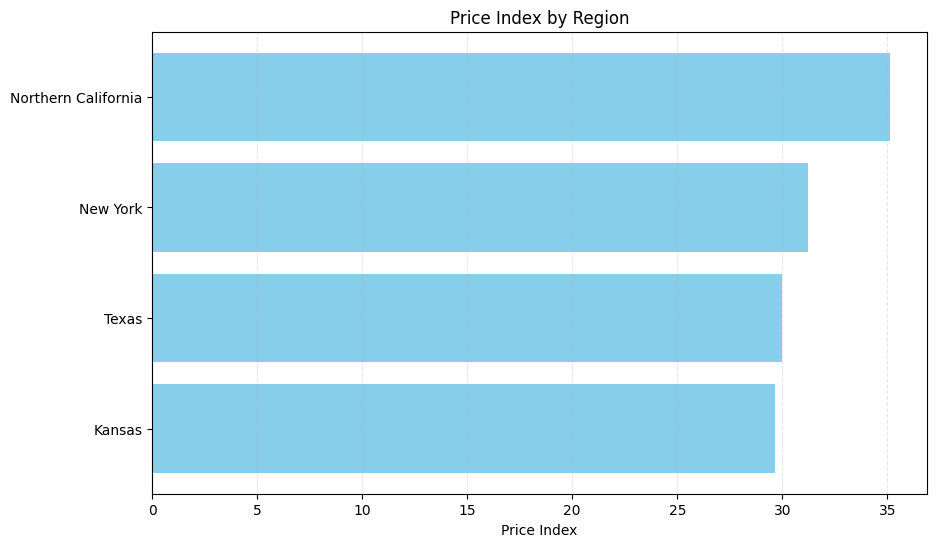

In [100]:
plt.figure(figsize=(10, 6))
plt.barh(price_index_df['Region'], price_index_df['Price_index'], color='skyblue')
plt.xlabel('Price Index')
plt.title('Price Index by Region')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [97]:
# Calculate average price per UPC in each region and store
average_prices_store = df_cleaned.groupby(['Region', 'Banner', 'UPC']).agg({'Price': 'mean'}).reset_index()

# Assign weights to each UPC (equal weight for simplicity)
weights = {upc: 1 for upc in df_cleaned['UPC'].unique()}  # Assigning equal weight for simplicity
average_prices_store['Weight'] = average_prices_store['UPC'].map(weights)

# Calculate the weighted average price for each store in each region
price_index_store = average_prices_store.groupby(['Region', 'Banner']).apply(lambda x: np.average(x['Price'], weights=x['Weight'])).reset_index()

# Rename the columns for clarity
price_index_store.columns = ['Region', 'Store', 'Price Index']
price_index_store = price_index_store.sort_values(by=['Region', 'Price Index', 'Store'])

# Display the result
print(price_index_store)



                 Region        Store  Price Index
2                Kansas      Walmart        27.65
1                Kansas  Trader Joes        29.25
3                Kansas      Wegmans        30.35
0                Kansas      Safeway        30.91
6              New York      Walmart        28.43
5              New York  Trader Joes        30.52
7              New York      Wegmans        30.89
8              New York  Whole Foods        33.83
4              New York      Safeway        35.29
10  Northern California      Walmart        32.85
9   Northern California  Trader Joes        34.38
11  Northern California  Whole Foods        38.42
14                Texas      Walmart        27.96
13                Texas  Trader Joes        29.32
15                Texas      Wegmans        30.12
12                Texas      Safeway        30.62
16                Texas  Whole Foods        32.82


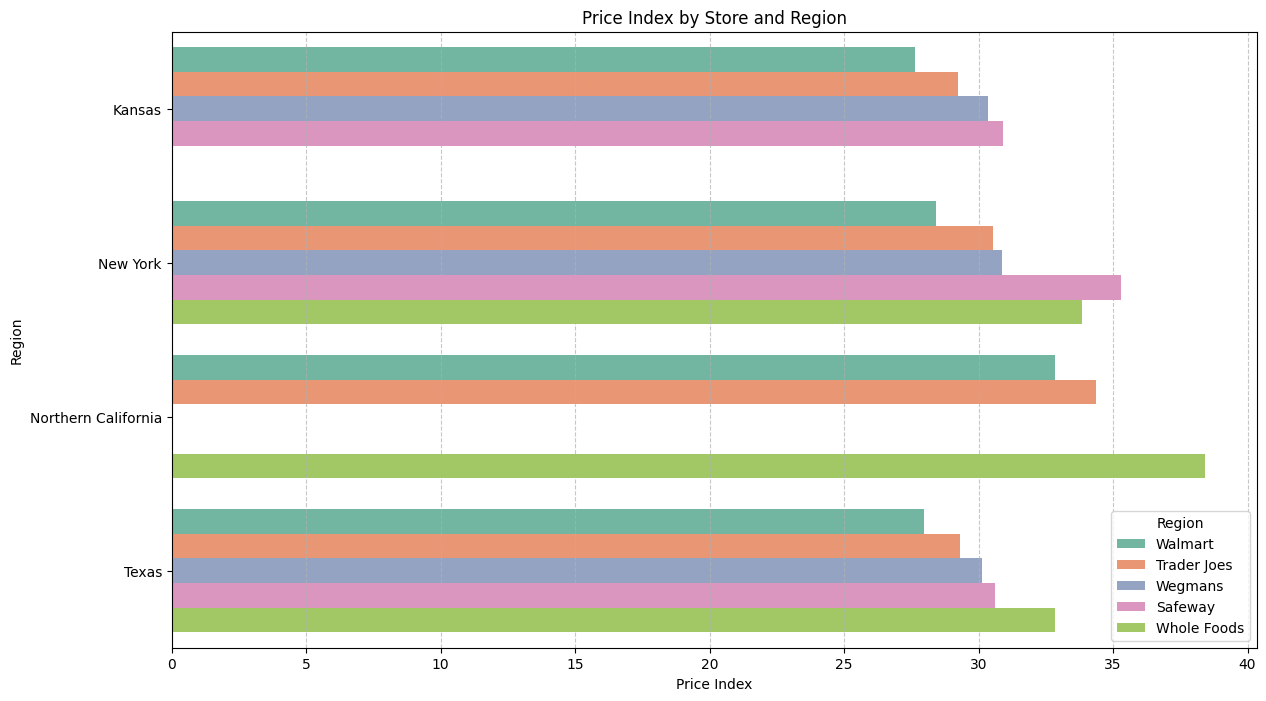

In [106]:
import seaborn as sns
plt.figure(figsize=(14, 8))
# sns.barplot(x='Price Index', y='Store', hue='Region', data=price_index_store, palette='Set2')
sns.barplot(x='Price Index', y='Region', hue='Store', data=price_index_store, palette='Set2')
plt.xlabel('Price Index')
plt.ylabel('Region')
plt.title('Price Index by Store and Region')
plt.legend(title='Region')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


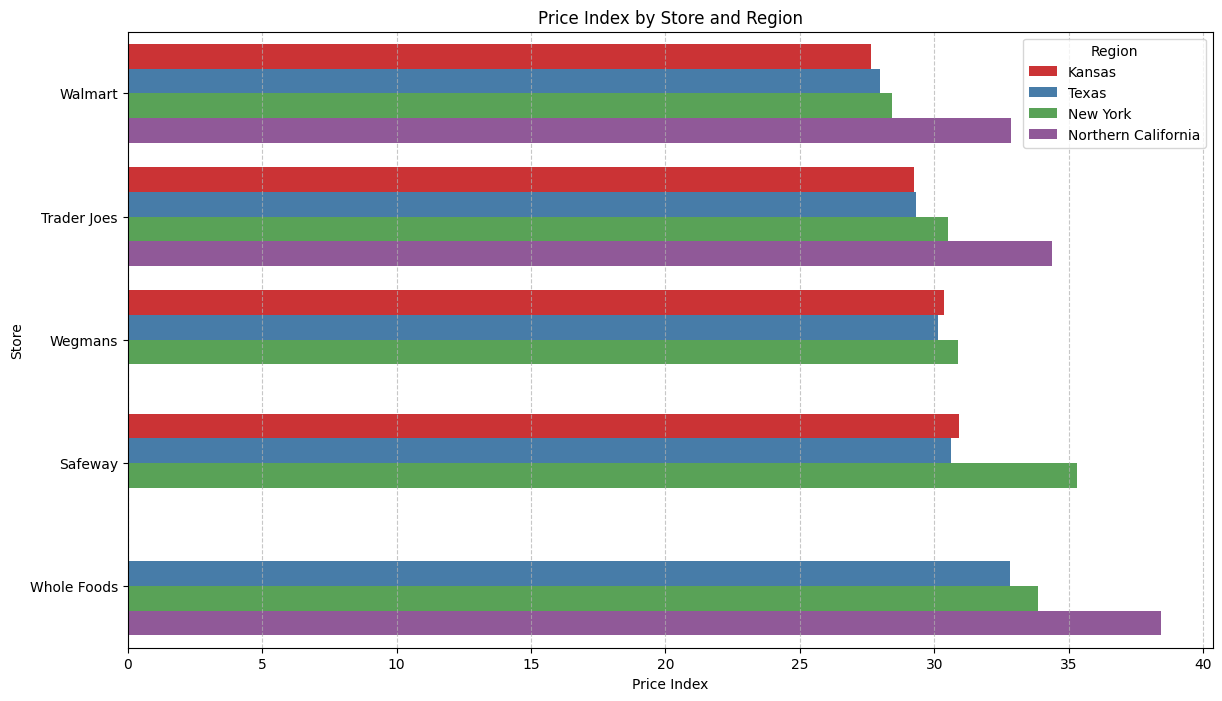

In [107]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Price Index', y='Store', hue='Region', data=price_index_store.sort_values(by=['Price Index', 'Store', 'Region']), palette='Set1')
# sns.barplot(x='Price Index', y='Region', hue='Store', data=price_index_store, palette='Set2')
plt.xlabel('Price Index')
plt.ylabel('Store')
plt.title('Price Index by Store and Region')
plt.legend(title='Region')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

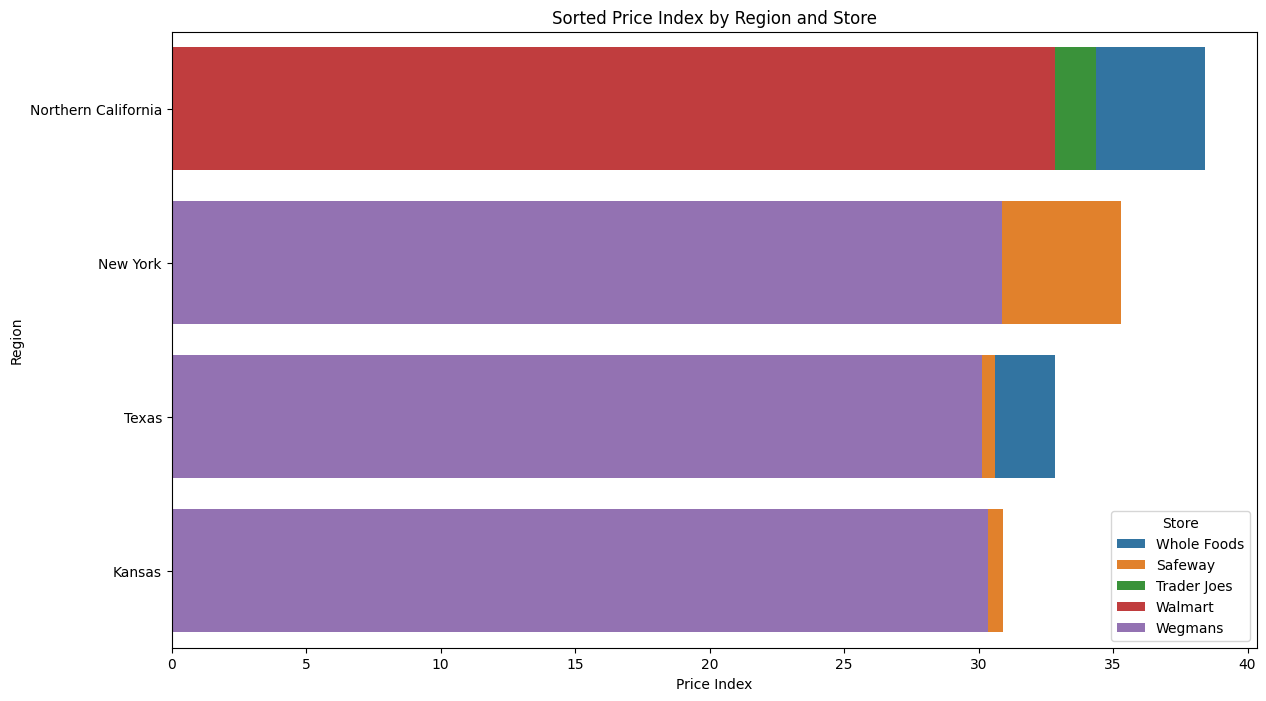

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average price per UPC in each region and store
average_prices_store = df_cleaned.groupby(['Region', 'Banner', 'UPC']).agg({'Price': 'mean'}).reset_index()

# Assign weights to each UPC (equal weight for simplicity)
weights = {upc: 1 for upc in df_cleaned['UPC'].unique()}  # Assigning equal weight for simplicity
average_prices_store['Weight'] = average_prices_store['UPC'].map(weights)

# Calculate the weighted average price for each store in each region
price_index_store = average_prices_store.groupby(['Region', 'Banner']).apply(lambda x: np.average(x['Price'], weights=x['Weight'])).reset_index()

# Rename the columns for clarity
price_index_store.columns = ['Region', 'Store', 'Price Index']

# Sort the price_index_store DataFrame by the Price Index
sorted_price_index_store = price_index_store.sort_values(by='Price Index', ascending=False)

# Set the size of the plot
plt.figure(figsize=(14, 8))

# Create a bar plot with sorted data
sns.barplot(data=sorted_price_index_store, x='Price Index', y='Region', hue='Store', dodge=False)

# Add title and labels
plt.title('Sorted Price Index by Region and Store')
plt.xlabel('Price Index')
plt.ylabel('Region')
plt.legend(title='Store')

# Show plot
plt.show()


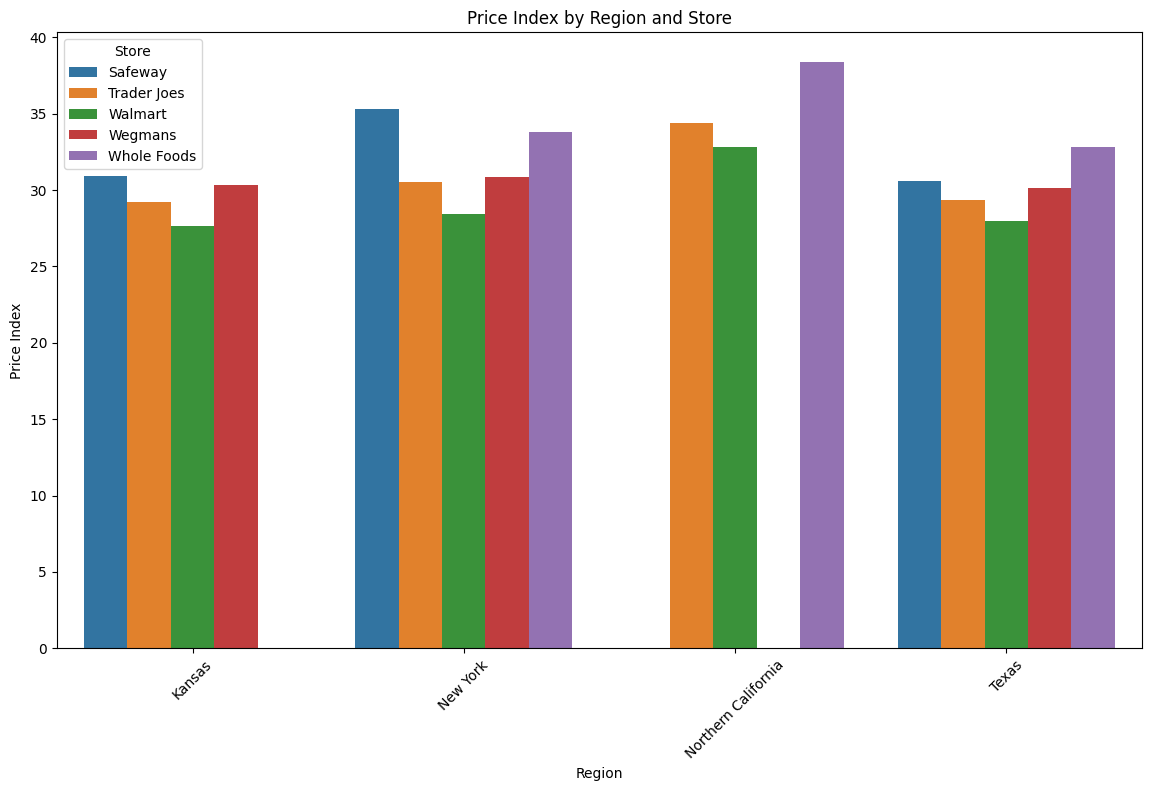

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the plot
plt.figure(figsize=(14, 8))

# Create a bar plot
sns.barplot(data=price_index_store, x='Region', y='Price Index', hue='Store')

# Add title and labels
plt.title('Price Index by Region and Store')
plt.xlabel('Region')
plt.ylabel('Price Index')
plt.xticks(rotation=45)
plt.legend(title='Store')

# Show plot
plt.show()


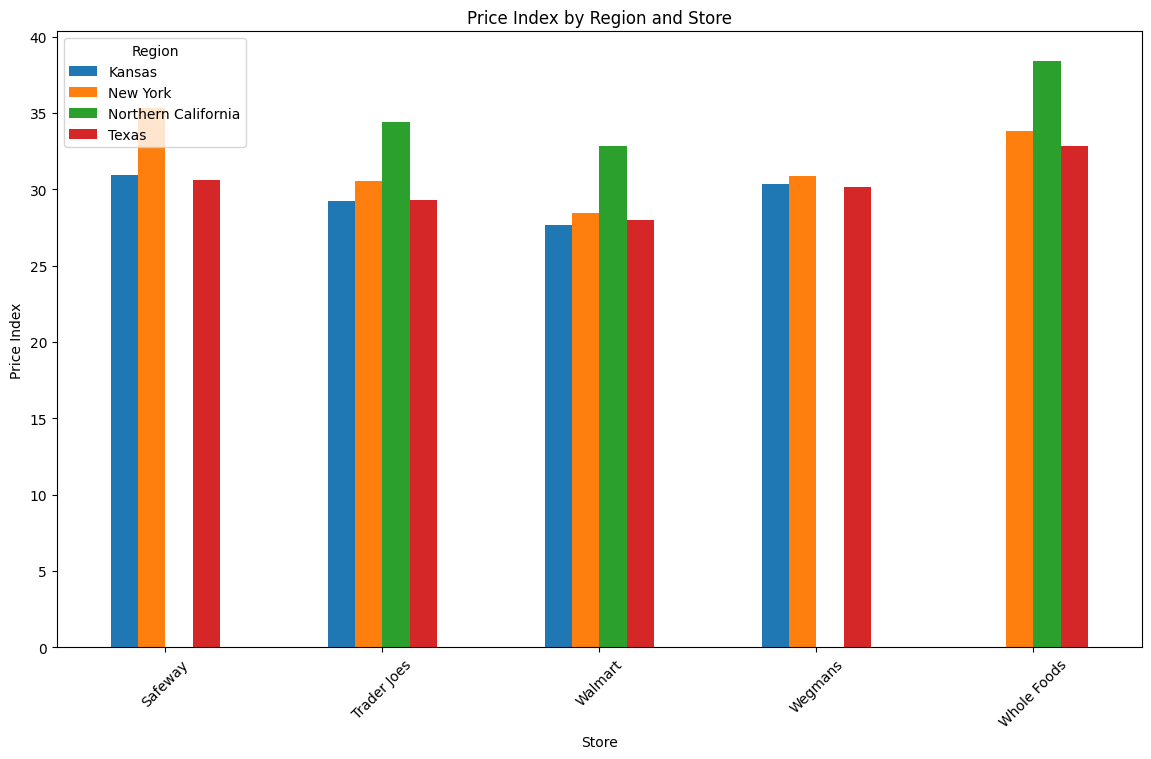

In [59]:
# Sort the price_index_store DataFrame by the Price Index
sorted_price_index_store = price_index_store.sort_values(by='Price Index', ascending=False)

# Create a pivot table for easier plotting
pivot_df = price_index_store.pivot(index='Store', columns='Region', values='Price Index')

# Set the size of the plot
pivot_df.plot(kind='bar', figsize=(14, 8))

# Add title and labels
plt.title('Price Index by Region and Store')
plt.xlabel('Store')
plt.ylabel('Price Index')
plt.xticks(rotation=45)
plt.legend(title='Region')

# Show plot
plt.show()


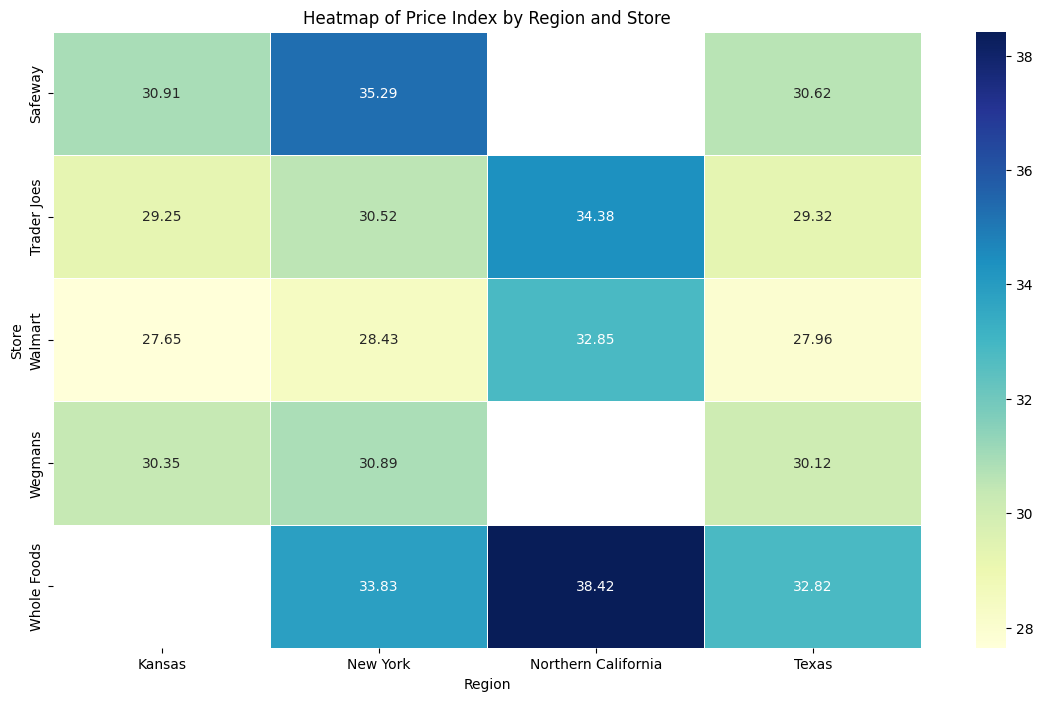

In [60]:

# Create a pivot table for the heatmap
pivot_df = price_index_store.pivot(index='Store', columns='Region', values='Price Index')

# Set the size of the plot
plt.figure(figsize=(14, 8))

# Create a heatmap
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)

# Add title and labels
plt.title('Heatmap of Price Index by Region and Store')
plt.xlabel('Region')
plt.ylabel('Store')

# Show plot
plt.show()


In [ ]:
# cross UPC only
ppt = {}
ppt['upc_idx'] = dfs['spa'].pivot_table(
    index=['UPC'],  # Indices for rows
    columns='Region',         # Columns for regions
    values='Price',           # Values to aggregate
    aggfunc='mean',           # Aggregation function
    # fill_value=0              # Fill missing values with 0
).reset_index()
ppt['upc_idx'].columns.name = None
print(len(ppt['upc_idx']), ' upc_idx pivot table')
display(ppt['upc_idx'])





In [ ]:
ppt['banner_idx'] = dfs['spa'].pivot_table(
    index=['Banner'],  # Indices for rows
    columns='Region',         # Columns for regions
    values='Price',           # Values to aggregate
    aggfunc='mean',           # Aggregation function
    # fill_value=0              # Fill missing values with 0
).reset_index()
ppt['banner_idx'].columns.name = None
print(len(ppt['banner_idx']), ' banner_idx pivot table')
display(ppt['banner_idx'])

In [ ]:
print(df[df['Banner'].isna()]['First'].unique())
display(df[df['Banner'].isna()])


In [ ]:
display(dfs['auditors'][(dfs['auditors']['First'] == 'Jill') | (dfs['auditors']['First'] == 'Bob')])

In [ ]:
display(dfs['sp'][(dfs['sp']['Auditor ID'] == 536) | (dfs['sp']['Auditor ID'] == 203)])

In [ ]:
# Create a pivot table
pivot_table = dfs['sp'].pivot_table(
    index=['Banner', 'UPC'],  # Indices for rows
    columns='Region',         # Columns for regions
    values='Price',           # Values to aggregate
    aggfunc='mean',           # Aggregation function
    # fill_value=0              # Fill missing values with 0
).reset_index()
# Flatten the columns
pivot_table.columns.name = None

# Display the pivot table
print(pivot_table)

In [ ]:
regions = dfs['sp']['Region']

In [ ]:
print(len(dfs['sp'][(dfs['sp']['Banner'].isna())& (dfs['sp']['Region'].isna())]))
display(dfs['sp'][(dfs['sp']['Banner'].isna())& (dfs['sp']['Region'].isna())])

In [ ]:
# Display the pivot table to inspect it
print(pivot_table)

# Check for significant price differences
i, j = 0, 0
sig_prod = []
for index, row in pivot_table.iterrows():
    i += 1
    prices = row[2:]
    price_significance = prices.max() / prices.min()
    if price_significance > 2:  # Arbitrary threshold for significant difference
        j += 1
        print(f"{j}. Significant price difference found for Banner: {row['Banner']}, UPC: {row['UPC']}")
        sig_prod.append(row['UPC'])
print(f"{j}/{i} = {i/j:.2f}")

# Check for missing data
missing_data = pivot_table[pivot_table.isnull().any(axis=1)]
if not missing_data.empty:
    print("Rows with missing data found:")
    print(missing_data)
else:
    print("No missing data found.")

# Check for outliers
q1 = pivot_table.quantile(0.25)
q3 = pivot_table.quantile(0.75)
iqr = q3 - q1
outliers = pivot_table[(pivot_table < (q1 - 1.5 * iqr)) | (pivot_table > (q3 + 1.5 * iqr))]
print("Outliers found:")
print(outliers)


In [ ]:
import pandas as pd

# Sample DataFrame
data = {
    'Auditor ID': [234, 234, 234, 234, 234],
    'Date': ['03/03/20', '03/12/20', '03/05/20', '03/08/20', '03/08/20'],
    'Price': [24.95, 49.71, 25.75, 18.81, 33.32],
    'Store ID': [66999, 66999, 66999, 66999, 66999],
    'UPC': [268588472, 475245085, 126967843, 708930835, 325885139],
    'Banner': ['Walmart', 'Walmart', 'Walmart', 'Walmart', 'Walmart'],
    'Region': ['Northern California', 'Northern California', 'Northern California', 'Northern California', 'Northern California']
}

df = pd.DataFrame(data)

# Create a pivot table
pivot_table = df.pivot_table(
    index=['Banner', 'UPC'],  # Indices for rows
    columns='Region',         # Columns for regions
    values='Price',           # Values to aggregate
    aggfunc='mean',           # Aggregation function
    fill_value=0              # Fill missing values with 0
).reset_index()

# Flatten the columns
pivot_table.columns.name = None

# Display the pivot table
print(pivot_table)
